<a href="https://colab.research.google.com/github/sakshia08/Blinkit_BI/blob/main/nn_cnn_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow.keras import datasets, utils

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


x_train and x_test are numpy arrays of shape
[50000, 32, 32, 3] and [10000, 32, 32, 3], respectively. y_train and
y_test are numpy arrays of shape [50000, 1] and [10000, 1],

1. Scale each image so that the pixel channel values lie between 0 and 1.
2. One-hot encode the labels—the new shapes of y_train and y_test are [50000, 10] and [10000, 10], respectively.

In [4]:
NUM_CLASSES = 10
x_train = x_train.astype('float32') / 255.0 #step 1
x_test = x_test.astype('float32') / 255.0
y_train = utils.to_categorical(y_train, NUM_CLASSES) #step 2
y_test = utils.to_categorical(y_test, NUM_CLASSES)

Tensor is just a multidimensional array. [5000, 32, 32, 3] is a tensor with 4 dimensions. The first dimension of this
tensor references the index of the image in the dataset, the second and third relate to the size of the image, and the last is the channel (i.e., red, green, or blue, since these are RGB images)

In [5]:
x_train[54, 12, 13, 1] # find the channel value of a specific pixel in an image.
#The green channel (1) value of the pixel in the (12,13) position of image 54

np.float32(0.36862746)

In [6]:
#Building our MLP using the functional API - can be done using sequential in this case
from tensorflow.keras import layers, models
input_layer = layers.Input(shape=(32, 32, 3))
x = layers.Flatten()(input_layer)
x = layers.Dense(units=200, activation = 'relu')(x)
x = layers.Dense(units=150, activation = 'relu')(x)
output_layer = layers.Dense(units=10, activation = 'softmax')(x)
model = models.Model(input_layer, output_layer)

Keras uses None as a marker
for the first dimension to show that it doesn’t yet know the number of observations
that will be passed into the network. That’s because tensor oper
ations are conducted across all observations simultaneously using linear algebra.

In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

By default, each
unit within a given layer is also connected to one additional bias
unit that always outputs 1. This ensures that the output from the
unit can still be nonzero even when all inputs from the previous
layer are 0.
Therefore, the number of parameters in the 200-unit Dense layer is
200 * (3,072 + 1) = 614,600.

In [8]:
from tensorflow.keras import optimizers
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
metrics=['accuracy'])

So far, we haven’t shown the model any data. We have just set up the architecture and compiled the model with a loss function and optimizer.
To train the model against the data, we simply call the fit method.

In [9]:
model.fit(x_train
, y_train
, batch_size = 32
, epochs = 10
, shuffle = True
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.2962 - loss: 1.9479
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4009 - loss: 1.6743
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4362 - loss: 1.5848
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.4558 - loss: 1.5312
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4657 - loss: 1.4890
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4761 - loss: 1.4683
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4924 - loss: 1.4286
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5001 - loss: 1.3988
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5081 - loss: 1.3838
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5180 - loss: 1.3559


The batch_size determines how many observations will be passed to the net
work at each training step.
The epochs determine how many times the network will be shown the full train
ing data.
If shuffle = True, the batches will be drawn randomly without replacement
from the training data at each training step.

First, the weights of the network are initialized to small random values. Then the net
work performs a series of training steps. At each training step, one batch of images is
passed through the network and the errors are backpropagated to update the weights.
The batch_size determines how many images are in each training step batch. The
larger the batch size, the more stable the gradient calculation, but the slower each
training step.
It would be far too time-consuming and computationally intensive
to use the entire dataset to calculate the gradient at each training
step, so generally a batch size between 32 and 256 is used.

In [10]:
#Evaluating the model performance on the test set - evaluate method
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4889 - loss: 1.4241


[1.4330856800079346, 0.4853000044822693]

In [11]:
#Viewing predictions on the test set using the predict method
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
, 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


preds is an array of shape [10000, 10]—i.e., a vector of 10 class probabilities for
each observation.
We convert this array of probabilities back into a single prediction using numpy’s
argmax function. Here, axis = –1 tells the function to collapse the array over the
last dimension (the classes dimension), so that the shape of preds_single is then
[10000, 1].

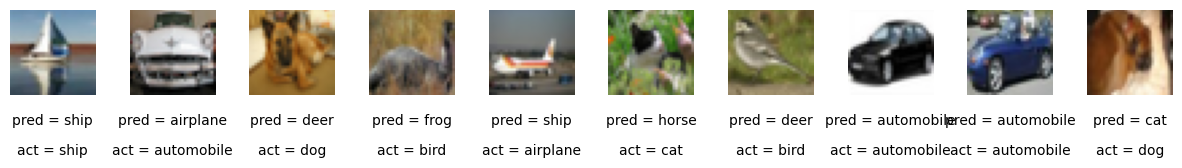

In [12]:
#Displaying predictions of the MLP against the actual labels
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
  , ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10
  , ha='center', transform=ax.transAxes)
  ax.imshow(img)

Here our first step is flattening the layer which is losing the spatial features of the image. use of convolution layer needed.

In [13]:
from tensorflow.keras import layers
input_layer = layers.Input(shape=(64,64,1))
conv_layer_1 = layers.Conv2D(
filters = 2
, kernel_size = (3,3)
, strides = 1
, padding = "same"
)(input_layer)

 strides parameter is the step size.  Increasing the stride therefore reduces the size of the output tensor. For exam
ple, when strides = 2, the height and width of the output tensor will be half the size
of the input tensor. This is useful for reducing the spatial size of the tensor as it passes
through the network. The padding = "same" input parameter pads the input data with zeros so that the
output size from the layer is exactly the same as the input size when strides = 1.

The output of a Conv2D layer is another four-dimensional tensor, now of shape
(batch_size, height, width, filters), so we can stack Conv2D layers on top of
each other to grow the depth of our neural network and make it more powerful.

In [14]:
from tensorflow.keras import layers, models
input_layer = layers.Input(shape=(32,32,3))
conv_layer_1 = layers.Conv2D(
filters = 10
, kernel_size = (4,4)
, strides = 2
, padding = 'same'
)(input_layer)
conv_layer_2 = layers.Conv2D(
filters = 20
, kernel_size = (3,3)
, strides = 2
, padding = 'same'
)(conv_layer_1)
flatten_layer = layers.Flatten()(conv_layer_2)
output_layer = layers.Dense(units=10, activation = 'softmax')(flatten_layer)
model = models.Model(input_layer, output_layer)

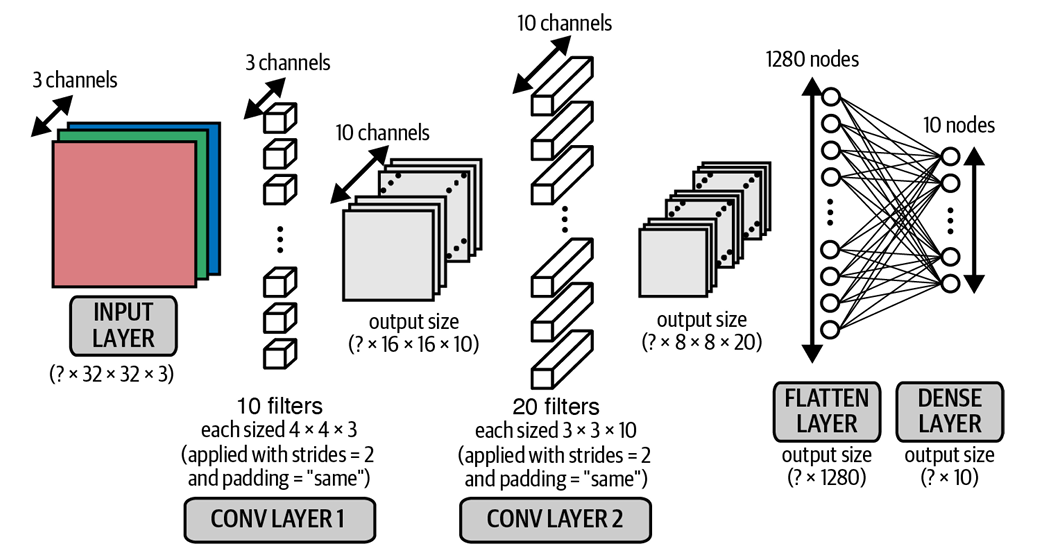

In [15]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 10)     │           490 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 20)       │         1,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,120 (59.06 KB)

 Trainable params: 15,120 (59.06 KB)

 Non-trainable params: 0 (0.00 B)

Dropout layers are used most commonly after dense layers since these are the most
prone to overfitting due to the higher number of weights, though you can also use
them after convolutional layers. Basically its a form of regularization

In [16]:
from tensorflow.keras import layers
layers.Dropout(rate = 0.25)

<Dropout name=dropout, built=True>

Three new Keras layer types: Conv2D, BatchNormalization, and
Dropout. Let’s put these pieces together into a CNN model

In [17]:
input_layer = layers.Input((32,32,3))

x = layers.Conv2D(filters = 32, kernel_size = 3
, strides = 1, padding = 'same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate = 0.5)(x)

output_layer = layers.Dense(10, activation = 'softmax')(x)

model = models.Model(input_layer, output_layer)

Usually batch normalization layers
are placed before the activation, but some successful architectures
use these layers the other way around. If you do choose to use
batch normalization before activation, you can remember the order
using the acronym BAD (batch normalization, activation, then
dropout)!

In [18]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592,554 (2.26 MB)

 Trainable params: 591,914 (2.26 MB)

 Non-trainable params: 640 (2.50 KB)

In [24]:
from tensorflow.keras import optimizers
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
metrics=['accuracy'])

In [25]:
model.evaluate(x_test, y_test, batch_size = 1000)

10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 804ms/step - accuracy: 0.0928 - loss: 2.3063


[2.3060667514801025, 0.094200000166893]

In [26]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
, 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


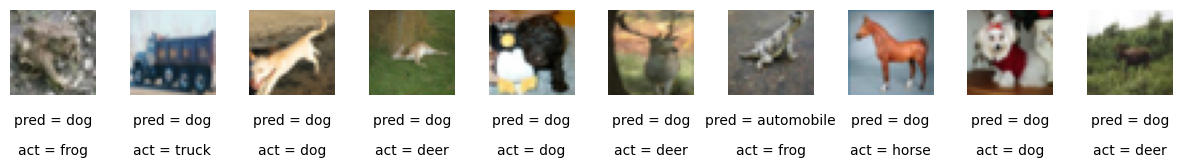

In [27]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
  , ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10
  , ha='center', transform=ax.transAxes)
  ax.imshow(img)

NOTE: Structure of NN   1. Sequential - Quickly defining a linear stack where one layer follows directly from the previous layer without branching.   2. Functional API calls - Layer receives input from multiple preceding layers = more flexible  